# Memoization & Dynamic Programming 

### Topics to discuss today:

<ul>
    <li>Time and Space Complexity  of recursive fibonnaci</li>
    <li>The fibonacci Tree</li>
    <li>storing solutions to sub problems</li>
    <li>solving popular problems</li>
</ul>
<br><br><br><br>

### The Fibonacci sequence

In [6]:
# Write out a function to find the nth number in the fibonnaci sequence
def fib(n):
    if n <= 1:
        return n
    else:
        return fib(n-1) + fib(n-2)

fib(5)


5

In [7]:
# iterative fibonacci
def fibonacci_iter(n):
    fib_list = [0,1]

    for i in range(2, n + 1):
        next_fib = fib_list[-1] + fib_list[-2]
        fib_list.append(next_fib)

    return fib_list
fibonacci_iter(5)

[0, 1, 1, 2, 3, 5]

In [8]:
#Dealing with Time space and recursion
def dib(n):
    if n <= 1:
        return n
    else:
        return dib(n-1) #extra call on the stack O(n)
dib(10)

1

Calculating the time space complexity of the Fibbonacci sequence


## Trees

the fibonacci sequence can be visualized using a tree structure. Lets look at the elements of a tree before discussing the fibonnaci tree:

<img src="https://www.tutorialspoint.com/data_structures_algorithms/images/binary_tree.jpg" style="height:400px;">

Let's look at the fibonnaci tree:

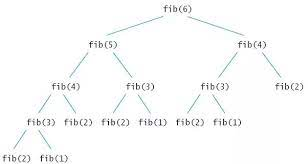

## Memoization

#### What is it?

In computing, memoization or memoisation is an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again. Memoization has also been used in other contexts (and for purposes other than speed gains), such as in simple mutually recursive descent parsing.

#### When should we use it?

Some problems are largely made of <b>overlapping subproblems</b>. When we find our code is solving the same problem multiple times over it's a good idea to store them so we don't have to recompute those solutions. This is known as Dynamic Programming 

In [11]:
#The super power of Dictionaries
def fib(n, cache = {}):
    if n in cache:
        return cache[n]
    if n <= 1:
        return n
    else:
        cache[n] = fib(n - 1) + fib(n - 2)
        return cache[n]

fib(1000)
    

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

## Decorators

<p>A Decorator in Python is a function that takes another function that as an argument, and returns a 3rd function. Decorators are extremely useful as they allow the extenson of an existing function, without any of the original source code.</p>

In [12]:
#Decorator Syntax

def shout(words):
    return words.upper()

print(shout("Hello there")) #regular function call

# store shout function to another variable name
yell = shout

# calling yell which is set to the shout function
print(yell("General Kenobi"))


HELLO THERE
GENERAL KENOBI


In [15]:
# passing function as an argument

def whisper(words):
    return words.lower()

# defining a function that takes another function as a parameter
def say_something(func):
    return func("My name is Morgan and I like to party")

print(say_something(shout))
# func as aprameter in the say_something function looks kinda like this:
# func = shout
# func = whisper
print(say_something(whisper))

MY NAME IS MORGAN AND I LIKE TO PARTY
my name is morgan and i like to party


In [17]:
#  decorators do opposite
# instead of passing in another functino as an argument to extend the utility of that function
# we pass the function we want to extend the utility of 

def say_something():
    return "My name is Morgan and I like to party"

def uppercase_decorator(function):

    # with decorators it is convention to have the outer funciton "wrap" the inner function
    # inner function is a wrapper function whre the actual argument is called/used

    # the inner function can access the outer local variables like the function
    # having the function inside of the function helps with maintenacne and debugging

    """
    Decorator to Uppsercase any argument passed into it
    """
    def wrapper():
        func = function()
        make_uppercase = func.upper()
        return make_uppercase
    return wrapper

return_func = uppercase_decorator(say_something)
return_func()

'MY NAME IS MORGAN AND I LIKE TO PARTY'

In [18]:
# decorator sytax
@uppercase_decorator
def say_hello():
    return "Hello There"

In [19]:
say_hello()

'HELLO THERE'

In [20]:
print(say_hello)

<function uppercase_decorator.<locals>.wrapper at 0x000001FE1EE39260>


In [30]:
# passing arguments into a decorator
def uppercase_decorator(function):
    def wrapper(*args, **kwargs):
        func = function(*args, **kwargs)
        make_upper = func.upper()  # Call the original function with any passed arguments & keyword arguments
        return make_upper  # Apply the uppercase transformation
    return wrapper

@uppercase_decorator
def teletubbies(*args):
    teletubbies = ",".join(args)
#     print(teletubbies)
    return f"{teletubbies}, Say Hello"

In [31]:
teletubbies("Tinky Winky", "Dipsy", "Lala", "Po")

'TINKY WINKY,DIPSY,LALA,PO, SAY HELLO'

In [35]:
my_tubbies = "Tinky Winky", "Dipsy", "La la", "Po"
result = teletubbies(my_tubbies)
print(result)

TypeError: sequence item 0: expected str instance, tuple found

## TwoSum Problem

Given an array of integers, return the two numbers such that they add up to a specific target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

In [34]:
def twoSum(array, target):
    dict1 = {}
    sum_total = 0
    the_target = target
    for i in array:
        if i not in dict1:
            dict1[i] = i
           
    for a in dict1:
        for b in dict1:
            if a + b == the_target:
                print(dict[a], dict[b])
                return a, b
            

twoSum([11, 12, 1, 22, 14, 3, 14, 5, 23], 19)

dict[14] dict[5]


(14, 5)

In [40]:
arr = [5, 1, 3, 9, 10, 6]
target = 10
# quadratic O(n^2)
def two_sum(arr, target):
    for i in range(len(arr)):
        for j in range(len(arr)):
            if arr[i] + arr[j] == target and i != j:
                return arr[i], arr[j]
two_sum(arr, target)
            

(1, 9)

In [36]:
def two_sum(arr, target):
    
    solution = {}
    
    for index, current_element in enumerate(arr):
        difference = target - current_element
        
        if difference in solution:
            # return indices of the two values
            indices = (solution[difference], index)
            # return the two values
            values = (arr[solution[difference]], current_element)
        
            return f"these are the two values: {values}. At these indices: {indices}. Value {values[0]} at index {indices[0]} and value {values[1]} at index {indices[1]}"

        
        solution[current_element] = index
    
    return None

two_sum([11, 12, 1, 22, 14, 3, 14, 5, 23], 19)

'these are the two values: (14, 5). At these indices: (6, 7). Value 14 at index 6 and value 5 at index 7'

In [43]:
#  Two pointers - constant space O(1) linear logarithmic time O(O n log(n))
arr = [5, 1, 3, 9, 10, 6]
target = 10

def two_sum_pointer(array,targer):
    array.sort()
    left = 0
    right = len(array) - 1

    while left < right:
        if array[left] + array[right] == target:
            return array[left], array[right]
        elif array[left] + array[right] > target:
            right -= 1
        else:
            left += 1

    return -1 # no match

two_sum_pointer(arr, target)
        

(1, 9)

In [33]:
# In Python, the space complexity of an algorithm can be quadratic if the algorithm uses a nested loop and 
# creates a new data structure for each iteration of the outer loop, and the size of the new data structure is 
# proportional to the number of iterations of the inner loop. For example, a nested loop that creates a new list 
# for each iteration of the outer loop, and appends to the list for each iteration of the inner loop, would have a 
# space complexity of O(n^2), where n is the number of iterations of the outer loop."




dict[14] dict[5]


(14, 5)

In [45]:
my_list = [[0]*num for num in arr]
print(my_list)

[[0], [0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [ ]:
# HOMEWORK

def sum_pairs(ints, s):
    my_dict = {}
    
    for i in ints:
        match = s - i
        if match in my_dict:
            return [match, i]
        my_dict[i] = i
    
    return None 

# I think this would be linear time and linear space becasue it is going linearly. 